In [8]:
import torch
from torch import nn
from torchmetrics import JaccardIndex

loss = nn.CrossEntropyLoss()
loss2 = nn.functional.cross_entropy
input = torch.randn(14, 4, 10, 10, requires_grad=True)
target = torch.randint(0, 4, size=(14, 10, 10))
output = loss(input, target)
output2 = loss2(input, target)

input_hat = input.softmax(dim=1).argmax(dim=1)

metric = JaccardIndex(ignore_index=0, task="multiclass", num_classes=4, average="micro")
metric(input, target)


tensor(0.1677)

In [3]:
output

tensor(1.7087, grad_fn=<NllLoss2DBackward0>)

In [14]:
output2

tensor(2.3923, grad_fn=<DivBackward1>)

In [8]:
input

tensor([[-0.0581, -0.8119, -0.3896,  0.5721, -0.1333],
        [-0.7342,  1.0222, -0.1043,  1.6946,  0.5277],
        [ 0.7041,  1.2577,  1.4935, -0.4094, -1.6888]], requires_grad=True)

In [9]:
target

tensor([[-1.0966, -0.1250,  0.2427,  1.2198, -1.5362],
        [ 2.7520,  1.1842,  0.4517,  1.1489,  1.2331],
        [ 1.6320,  2.2495,  0.3007, -0.4670, -0.8559]])

Seed set to 4


Loaded 1344 images from D:/AKairys/DFUC2022/Examples/decoder-denoising/data/train-patched


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.]


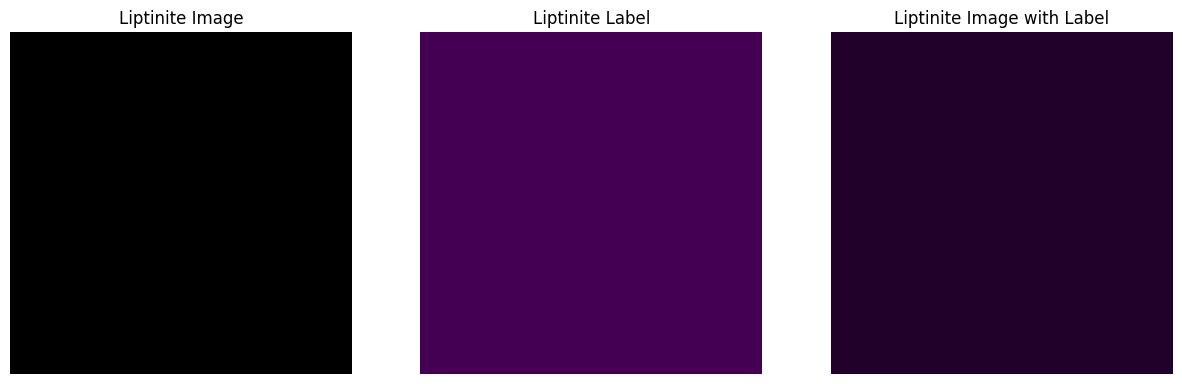

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 3.]


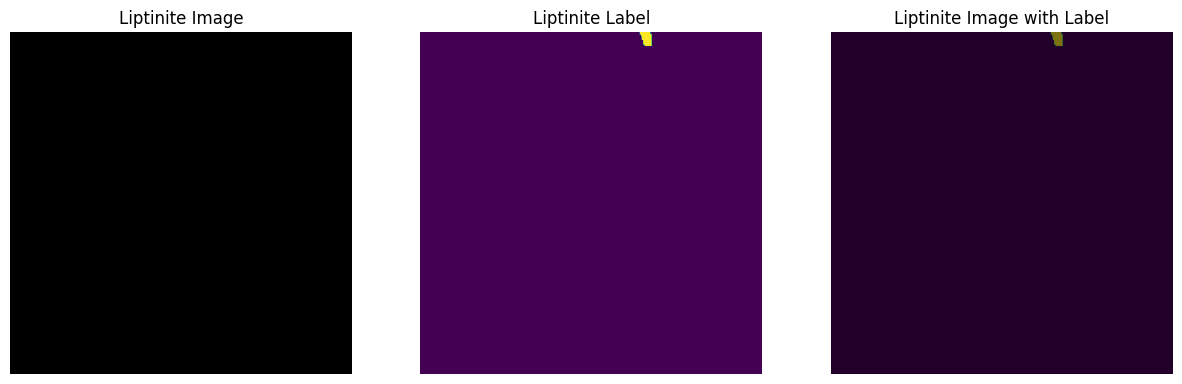

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 3.]


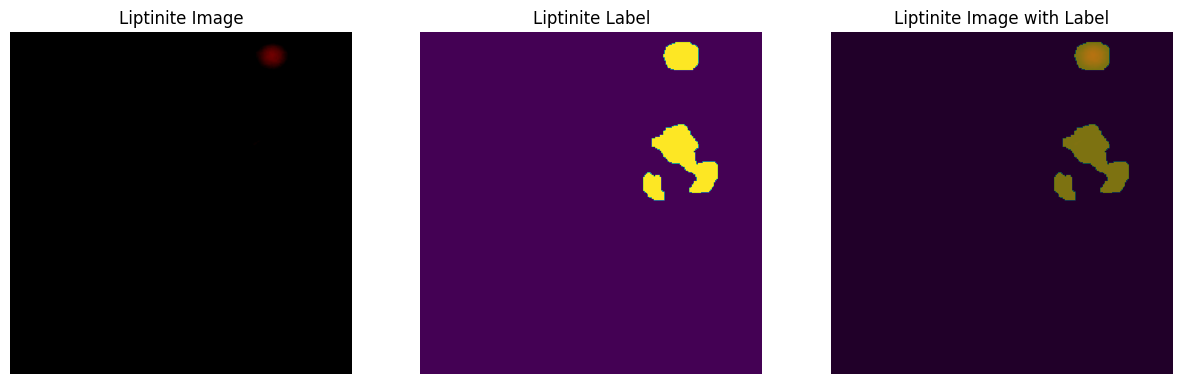

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.]


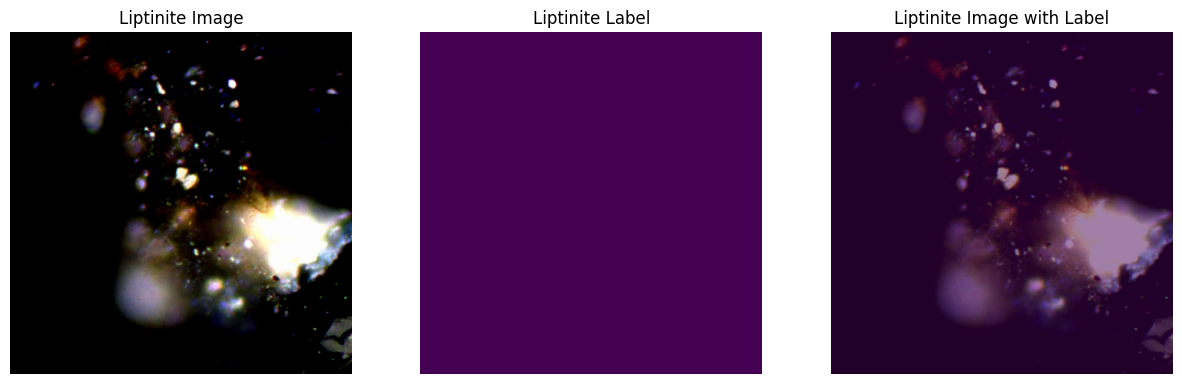

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.]


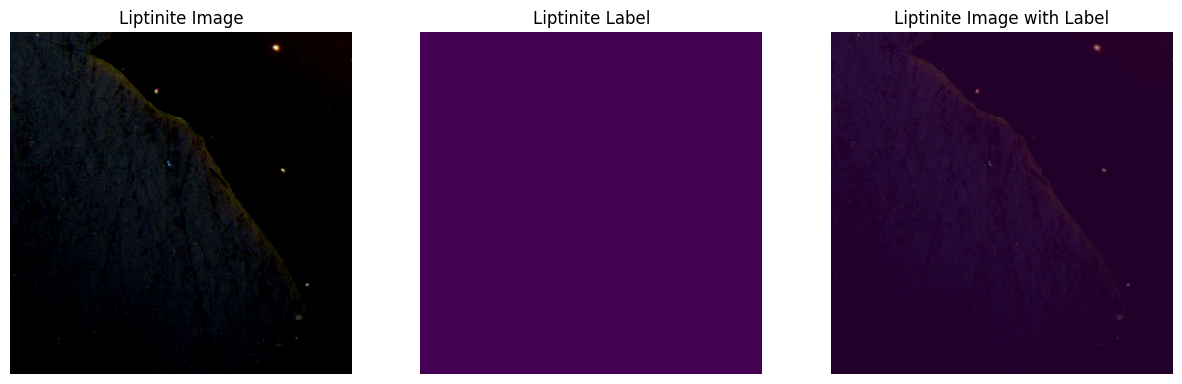

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1. 2.]


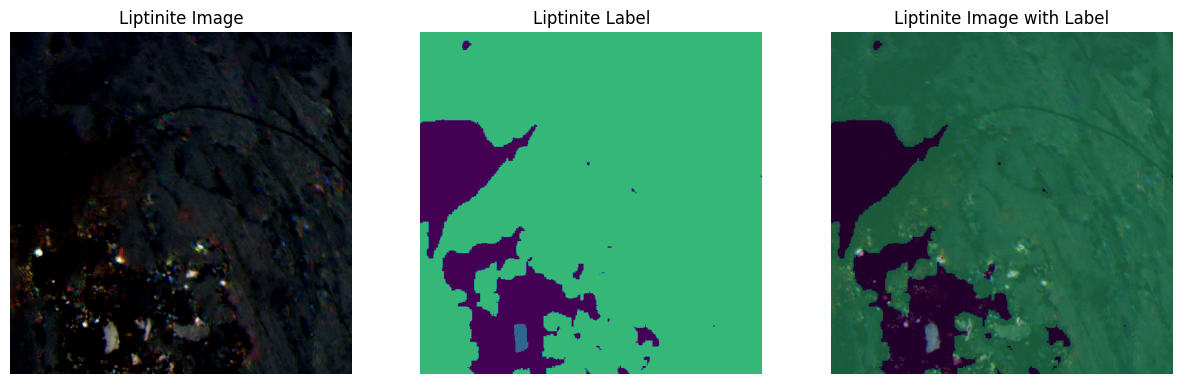

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 3.]


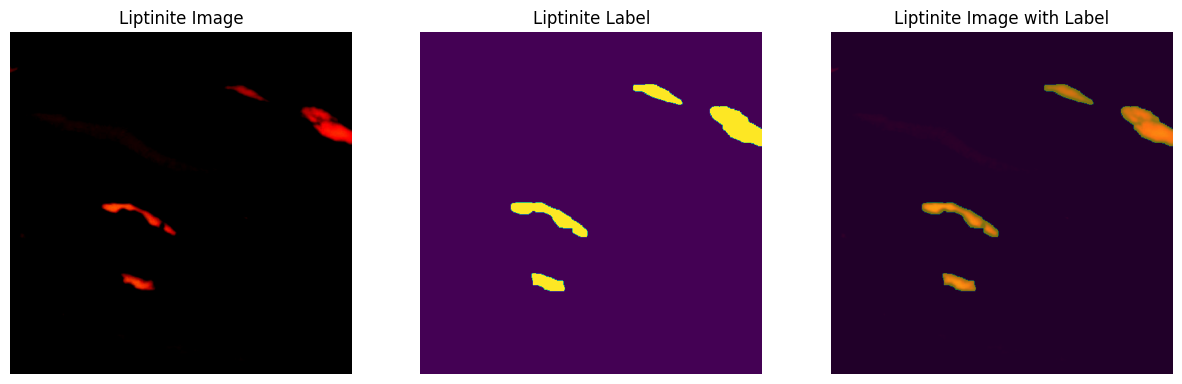

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1.]


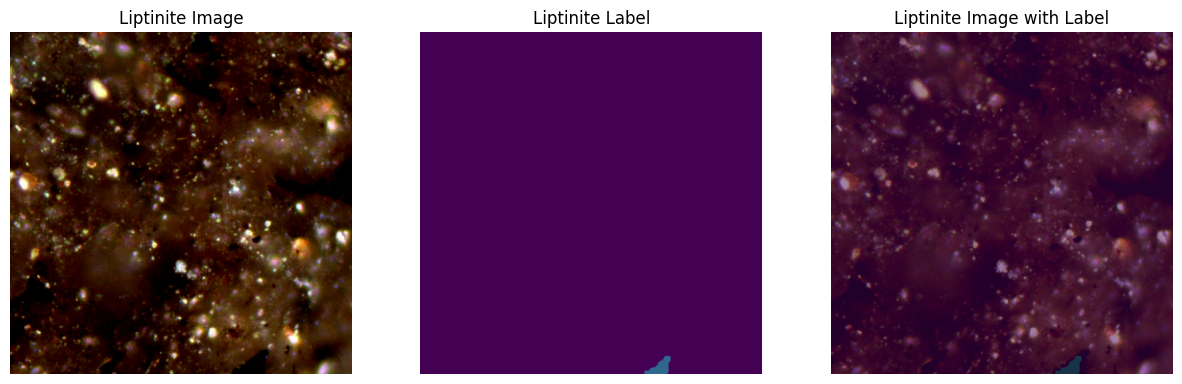

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 3.]


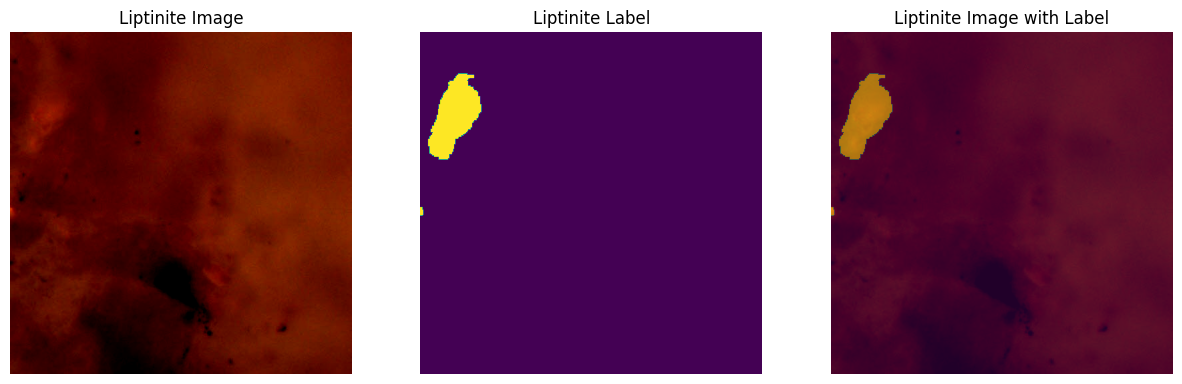

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1.]


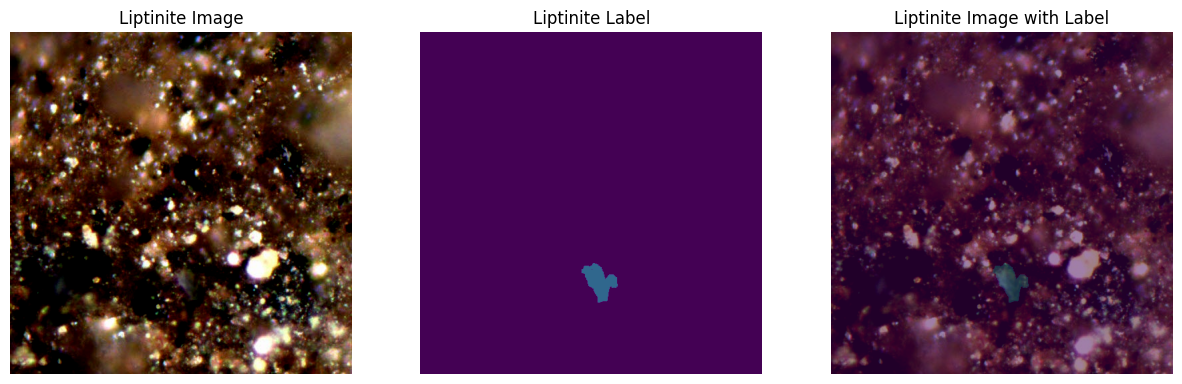

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.]


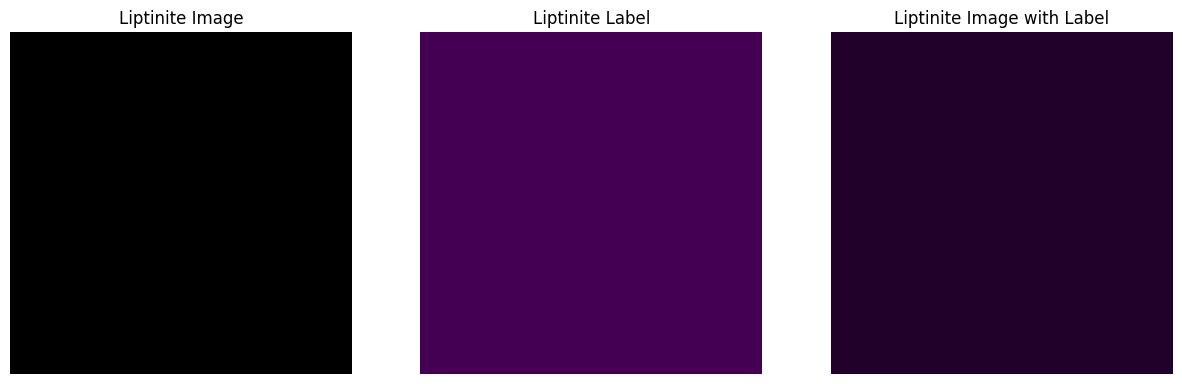

In [1]:
from src.model import FineTuningModel
from src.data import SupervisedDataModule
from lightning.pytorch import seed_everything, Trainer
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint
import torch
import os
import matplotlib.pyplot as plt
import numpy as np

def sliding_window(image, window_size, stride):
    patches = []
    _, _, H, W = image.size()

    # Iterate over rows
    for i in range(0, H - window_size + 1, stride):
        # Iterate over columns
        for j in range(0, W - window_size + 1, stride):
            # Extract patch
            patch = image[:, :, i:i+window_size, j:j+window_size]
            patches.append([i, j, patch])  # Store patch position for stitching later

    return patches

def stitch_patches(patches, image_size):
    stitched_image = torch.zeros(*image_size)

    for i, j, patch in patches:
        _, _, h, w = patch.size()
        stitched_image[:, :, i:i+h, j:j+w] += patch

    return stitched_image



seed_everything(4, workers=True)
dm_class = SupervisedDataModule

dm = dm_class(root="D:/AKairys/DFUC2022/Examples/decoder-denoising/data/train",
              batch_size=14, num_val=5)

dm.setup()
i=0
for batch in dm.train_dataloader():
    img, label = batch
    
    arrone = torch.ones((1,1,*img[0].shape[-2:]))
    contribution = stitch_patches(sliding_window(arrone, 512, 256), arrone.size())
    
    image
    
    
    # print(img[0].shape])
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img[0].permute(1, 2, 0))
    ax[0].set_title('Liptinite Image')
    ax[0].axis('off')
    ax[1].imshow(label[0].permute(1, 2, 0), vmin=0, vmax=3)
    ax[1].set_title('Liptinite Label')
    ax[1].axis('off')
    ax[2].imshow(img[0].permute(1, 2, 0))
    ax[2].set_title('Liptinite Image with Label')
    ax[2].axis('off')
    ax[2].imshow(label[0].permute(1, 2, 0), alpha=0.5, vmin=0, vmax=3)
    print(np.unique(label[0]))
    plt.show()
    i+=1
    if i>10:
        break


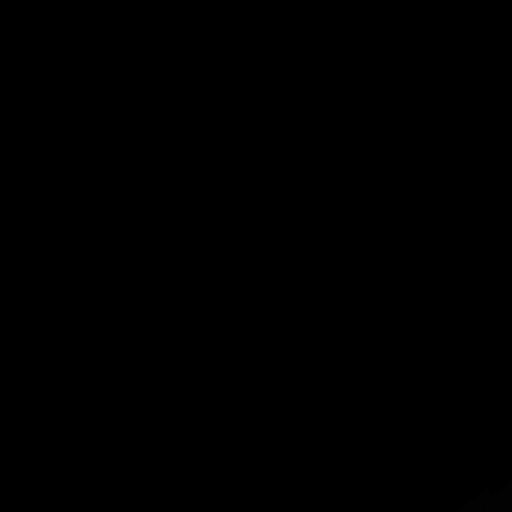

In [8]:
import numpy as np
from PIL import Image

mask_path = r"D:\AKairys\DFUC2022\Examples\decoder-denoising\data\train-patched\label\0gu2ibx_gt.npy"
mask_array = np.load(mask_path)
img = Image.fromarray(mask_array, mode="L")
img